In [1]:
import numpy as np
import pandas as pd

In [240]:
raw_mail_data = pd.read_csv("/content/mail_data.csv",encoding='cp1252')

In [3]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ã¼ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


1. DATA CLEANING

In [4]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [5]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail_data.shape

(5572, 2)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
mail_data['Category'] = encoder.fit_transform(mail_data['Category'])

In [9]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#missing values
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
#checking duplicate values
mail_data.duplicated().sum()

415

In [12]:
#remove duplicate values
mail_data = mail_data.drop_duplicates(keep='first')
mail_data.duplicated().sum()

0

In [13]:
mail_data.shape

(5157, 2)

2. EDA

In [14]:
mail_data['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

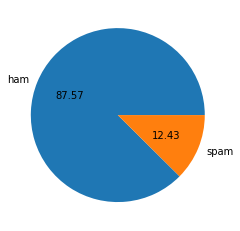

In [15]:
import matplotlib.pyplot as plt
plt.pie(mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk

In [17]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
#counting number of letters in the message
mail_data['num_characters'] = mail_data['Message'].apply(len)

In [20]:
mail_data.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",108
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#counting number of words
mail_data['num_words'] = mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
mail_data.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",108,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
mail_data['num_sentences'] = mail_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
mail_data.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",108,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
mail_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.227458,18.562924,1.950553
std,58.450848,13.419926,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
#ham
mail_data[mail_data['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.950399,17.270372,1.806244
std,56.729579,13.603830,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#spam
mail_data[mail_data['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.669267,2.967239
std,30.516111,7.104343,1.480241
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


3. DATA PREPROCESSING

In [28]:
#lower case
#Tokenization
#special characters
#Removing stop words and punctuations
#stemming
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [30]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)
    
  

In [32]:
mail_data['transform_text'] = mail_data['Message'].apply(transform_text)

In [33]:
mail_data.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",108,23,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4. MODEL BUILDING

In [227]:
#text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [228]:
X = tfidf.fit_transform(mail_data['transform_text']).toarray()

In [229]:
X.shape

(5157, 3000)

In [230]:
y = mail_data['Category'].values

In [231]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [234]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [235]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [236]:
#train
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8662790697674418
[[784 121]
 [ 17 110]]
0.47619047619047616


In [237]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9728682170542635
[[905   0]
 [ 28  99]]
1.0


In [217]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [218]:
# tfidf --> MNB

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

In [220]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [221]:
clfs = {
    'NB': mnb,
     'LR': lrc,
     'GBDT':gbdt,
}

In [222]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [223]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  NB
Accuracy -  0.9612403100775194
Precision -  1.0
For  LR
Accuracy -  0.9515503875968992
Precision -  0.9230769230769231
For  GBDT
Accuracy -  0.9525193798449613
Precision -  0.975609756097561


In [224]:
performance_md = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [225]:
performance_md

,Algorithm,Accuracy,Precision
0,NB,0.961240,1.000000
2,GBDT,0.952519,0.975610
1,LR,0.951550,0.923077


In [197]:
performance_md1 = pd.melt(performance_md, id_vars = "Algorithm")

In [198]:
performance_md1

,Algorithm,variable,value
0,NB,Accuracy,0.972868
1,GBDT,Accuracy,0.950581
2,LR,Accuracy,0.960271
3,NB,Precision,1.000000
4,GBDT,Precision,0.975000
5,LR,Precision,0.938776


In [199]:
import seaborn as sns

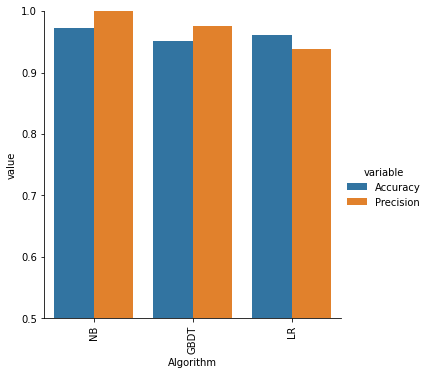

In [200]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_md1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [201]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [226]:
performance_md.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.961240,1.000000,0.972868,1.000000
1,GBDT,0.952519,0.975610,0.950581,0.975000
2,LR,0.951550,0.923077,0.960271,0.938776


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))